In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [88]:
data_file = "/content/drive/MyDrive/Colab Notebooks/Nispera/data/final_data_60min.csv"
df = pd.read_csv(data_file)


In [89]:
df_pc = df[(df["ID"] == "ID12")]# | (df["ID"] == "ID7")]
df_pc["datetime"] = pd.to_datetime(df_pc['datetime'].str.strip(), format='%Y-%m-%d %H:%M:%S')
df_pc["week"] = df_pc["datetime"].dt.week
df_pc_w2 = df_pc[(df_pc["week"] == 2)]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
df = df_pc_w2

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 26592 to 26759
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   ID                                       168 non-null    object        
 1   problem_class                            168 non-null    object        
 2   datetime                                 168 non-null    datetime64[ns]
 3   environment_air_temperature_avg          168 non-null    float64       
 4   environment_wind_speed_avg               168 non-null    float64       
 5   grid_power_active_avg                    168 non-null    float64       
 6   nacelle_direction_avg                    168 non-null    float64       
 7   rotor_blades_pitch_angle_avg             168 non-null    float64       
 8   rotor_rotation_speed_avg                 168 non-null    float64       
 9   environment_wind_direction_absolute_a

In [80]:
df["problem_class"].unique()

array(['Power Curtailments'], dtype=object)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 26592 to 26759
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   ID                                       168 non-null    object        
 1   problem_class                            168 non-null    object        
 2   datetime                                 168 non-null    datetime64[ns]
 3   environment_air_temperature_avg          168 non-null    float64       
 4   environment_wind_speed_avg               168 non-null    float64       
 5   grid_power_active_avg                    168 non-null    float64       
 6   nacelle_direction_avg                    168 non-null    float64       
 7   rotor_blades_pitch_angle_avg             168 non-null    float64       
 8   rotor_rotation_speed_avg                 168 non-null    float64       
 9   environment_wind_direction_absolute_a

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
knn = KNNImputer(n_neighbors=5)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 26592 to 26759
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   ID                                       168 non-null    object        
 1   problem_class                            168 non-null    object        
 2   datetime                                 168 non-null    datetime64[ns]
 3   environment_air_temperature_avg          168 non-null    float64       
 4   environment_wind_speed_avg               168 non-null    float64       
 5   grid_power_active_avg                    168 non-null    float64       
 6   nacelle_direction_avg                    168 non-null    float64       
 7   rotor_blades_pitch_angle_avg             168 non-null    float64       
 8   rotor_rotation_speed_avg                 168 non-null    float64       
 9   environment_wind_direction_absolute_a

In [ ]:
df["environment_wind_direction_absolute_avg"] = knn.fit_transform(df["environment_wind_direction_absolute_avg"].values.reshape(-1,1))
df["nacelle_direction_avg"] = knn.fit_transform(df["nacelle_direction_avg"].values.reshape(-1,1))
df["rotor_blades_pitch_angle_avg"] = knn.fit_transform(df["rotor_blades_pitch_angle_avg"].values.reshape(-1,1))

ValueError: ignored

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 26592 to 26759
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   ID                                       168 non-null    object        
 1   problem_class                            168 non-null    object        
 2   datetime                                 168 non-null    datetime64[ns]
 3   environment_air_temperature_avg          168 non-null    float64       
 4   environment_wind_speed_avg               168 non-null    float64       
 5   grid_power_active_avg                    168 non-null    float64       
 6   nacelle_direction_avg                    168 non-null    float64       
 7   rotor_blades_pitch_angle_avg             168 non-null    float64       
 8   rotor_rotation_speed_avg                 168 non-null    float64       
 9   environment_wind_direction_absolute_a

In [75]:
df.dropna(inplace=True)
df.drop(columns=["ID"], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   problem_class                            0 non-null      object        
 1   datetime                                 0 non-null      datetime64[ns]
 2   environment_air_temperature_avg          0 non-null      float64       
 3   environment_wind_speed_avg               0 non-null      float64       
 4   grid_power_active_avg                    0 non-null      float64       
 5   nacelle_direction_avg                    0 non-null      float64       
 6   rotor_blades_pitch_angle_avg             0 non-null      float64       
 7   rotor_rotation_speed_avg                 0 non-null      float64       
 8   environment_wind_direction_absolute_avg  0 non-null      float64       
 9   week                                     0 non-null    

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X = df[["environment_air_temperature_avg", "environment_wind_speed_avg","grid_power_active_avg", "rotor_blades_pitch_angle_avg"]]

In [91]:
X = df[["environment_air_temperature_avg", "environment_wind_speed_avg","grid_power_active_avg","nacelle_direction_avg", "rotor_blades_pitch_angle_avg"]].values



In [92]:
y = df["problem_class"]

In [93]:
df["problem_class"].unique()

array(['Power Curtailments'], dtype=object)

In [94]:

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [95]:

import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix: \n', cov_mat)

Covariance matrix: 
 [[ 1.00598802  0.35828734  0.29138857  0.2414091   0.09843354]
 [ 0.35828734  1.00598802  0.92137131  0.05862163  0.37146534]
 [ 0.29138857  0.92137131  1.00598802 -0.02550145  0.19675635]
 [ 0.2414091   0.05862163 -0.02550145  1.00598802  0.23573829]
 [ 0.09843354  0.37146534  0.19675635  0.23573829  1.00598802]]


In [96]:
print('NumPy covariance matrix: \n',  np.cov(X_std.T))

NumPy covariance matrix: 
 [[ 1.00598802  0.35828734  0.29138857  0.2414091   0.09843354]
 [ 0.35828734  1.00598802  0.92137131  0.05862163  0.37146534]
 [ 0.29138857  0.92137131  1.00598802 -0.02550145  0.19675635]
 [ 0.2414091   0.05862163 -0.02550145  1.00598802  0.23573829]
 [ 0.09843354  0.37146534  0.19675635  0.23573829  1.00598802]]


In [97]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors: \n', eig_vecs)
print('\nEigenvalues: \n', eig_vals)

Eigenvectors: 
 [[ 0.36389579  0.05209998 -0.56523104  0.68616829  0.27304283]
 [ 0.62842494 -0.72891578  0.15801762 -0.06358067 -0.21154625]
 [ 0.58552687  0.6682332   0.30111692  0.02426257 -0.34548893]
 [ 0.14700665  0.01542711  0.58371747  0.08584754  0.79376014]
 [ 0.32895179  0.1385416  -0.47344146 -0.71914679  0.3623231 ]]

Eigenvalues: 
 [2.28009225 0.06386898 0.58373603 0.91013093 1.19211193]


In [98]:

cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors: \n', eig_vecs)
print('\nEigenvalues: \n', eig_vals)

Eigenvectors: 
 [[ 0.36389579  0.05209998 -0.56523104  0.68616829  0.27304283]
 [ 0.62842494 -0.72891578  0.15801762 -0.06358067 -0.21154625]
 [ 0.58552687  0.6682332   0.30111692  0.02426257 -0.34548893]
 [ 0.14700665  0.01542711  0.58371747  0.08584754  0.79376014]
 [ 0.32895179  0.1385416  -0.47344146 -0.71914679  0.3623231 ]]

Eigenvalues: 
 [2.26652027 0.06348881 0.58026141 0.90471349 1.18501602]


In [99]:
u,s,v = np.linalg.svd(X_std.T)
print('Vectors U:\n', u)

Vectors U:
 [[-0.36389579  0.27304283 -0.68616829 -0.56523104 -0.05209998]
 [-0.62842494 -0.21154625  0.06358067  0.15801762  0.72891578]
 [-0.58552687 -0.34548893 -0.02426257  0.30111692 -0.6682332 ]
 [-0.14700665  0.79376014 -0.08584754  0.58371747 -0.01542711]
 [-0.32895179  0.3623231   0.71914679 -0.47344146 -0.1385416 ]]


In [100]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [101]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.2665202718350357
1.1850160213077865
0.9047134851480272
0.580261409472167
0.06348881223698102


In [102]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [103]:
cum_var_exp

array([ 45.33040544,  69.03072586,  87.12499557,  98.73022376,
       100.        ])

In [105]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(5,1),
                      eig_pairs[1][1].reshape(5,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.36389579  0.27304283]
 [ 0.62842494 -0.21154625]
 [ 0.58552687 -0.34548893]
 [ 0.14700665  0.79376014]
 [ 0.32895179  0.3623231 ]]


In [106]:
Y = X_std.dot(matrix_w)

In [ ]:
print(Y)

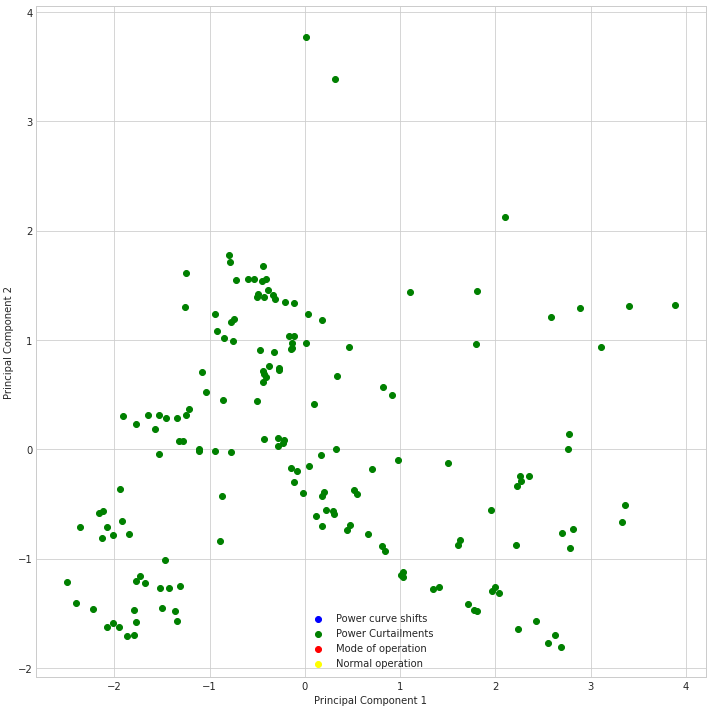

In [107]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    for lab, col in zip(('Power curve shifts', 'Power Curtailments', 'Mode of operation',
       'Normal operation'),
                        ('blue', "green", "red", "yellow", "orange", "magenta", "black")):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()


In [108]:
PCA_df= pd.DataFrame(Y)

In [ ]:
PCA_df

In [ ]:
PCA_df_6 = PCA_df[(PCA_df[0] > 6)] #we create the dataframes for the numbers bigger than 6


In [109]:
PCA_df_g1 = PCA_df[(PCA_df[0] < -1) & (PCA_df[1] < -0.5)] #df for the numbers between 2 asnd 6

In [115]:
PCA_df_g2 = PCA_df[(PCA_df[0] > 1)] #df for the points below 2

In [ ]:
PCA_df_6_2

In [111]:
df_pc_w2["labels"] = "no anomally"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
for i in (PCA_df_g1.index): #this adds Anomaly_1 to those in the list. Sames applies for the rest
  df_pc_w2["labels"].iloc[i] = "Anomaly_1"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
for i in (PCA_df_g2.index):
  df_pc_w2["labels"].iloc[i] = "Anomaly_2"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
for i in (PCA_df_2.index):
  df_pc_w2["labels"].iloc[i] = "Anomaly_3"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



IndexError: ignored

In [ ]:
df_pc_w2

In [ ]:
import plotly.express as px

In [118]:
fig = px.scatter(df_pc_w2, x="environment_wind_speed_avg", y="grid_power_active_avg", color = "labels")
fig.show()